K-NEAREST NEIGHBOURS

Loading the Dataset:

In [3]:
import pandas as pd

In [5]:
df=pd.read_csv("C:\\DataScience25\\official_assignments\\KNN\\KNN\\Zoo.csv")

In [7]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
df.shape

(101, 18)

In [11]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [13]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

1.Analyse the data using the visualizations

Histogram for Leg Feature:

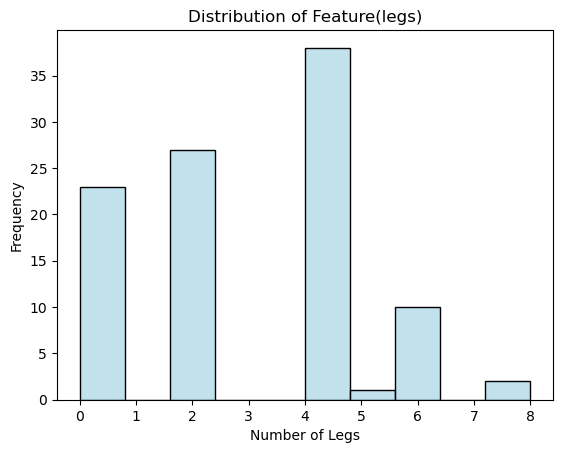

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['legs'],color="LightBlue",edgecolor='black')
plt.xlabel("Number of Legs")
plt.ylabel("Frequency")
plt.title("Distribution of Feature(legs)")
plt.show()

From the histogram, we observe that most animals have 4 legs, while very few have 5, indicating that the legs feature is skewed.

Count Plot for Animal Type:

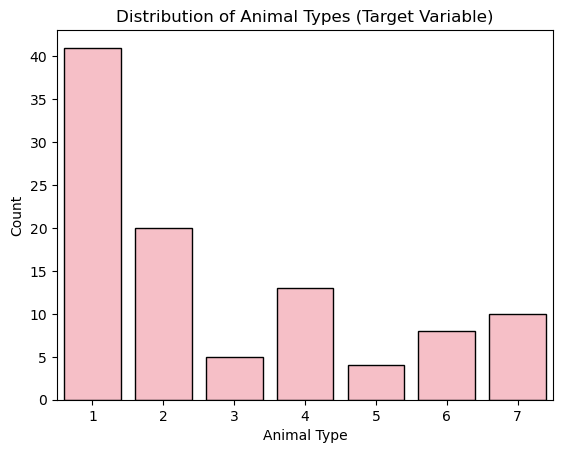

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=df,color='lightpink',edgecolor="black")
plt.title("Distribution of Animal Types (Target Variable)")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()


The count plot of the target variable (type) reveals that type 1 animals are the most frequent, whereas type 5 is rare, showing class imbalance.

Correlation Heatmap

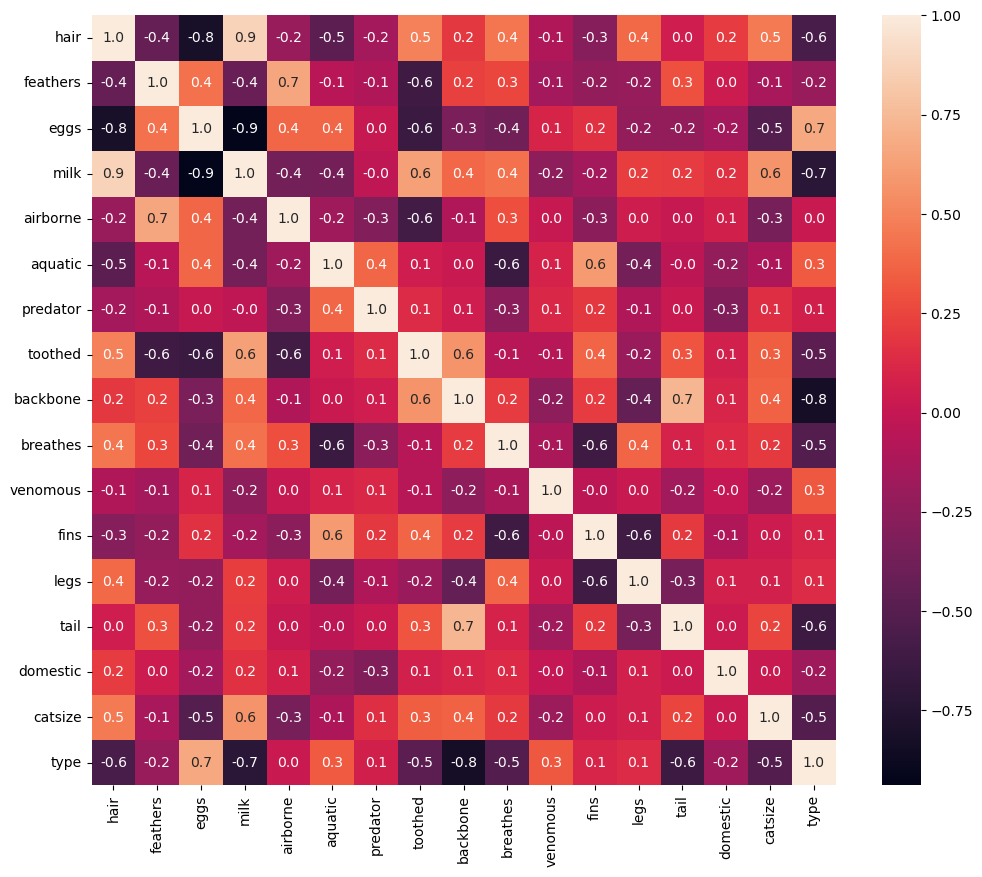

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".1f")
plt.show()

The heatmap reveals strong negative correlation between eggs and milk, and between hair and both milk and eggs.

Moderate positive correlation exists between type and features like feathers, airborne, and toothed.



2.Preprocess the data by handling missing values & Outliers, if any.

In [77]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

There are no missing values present in the dataset.

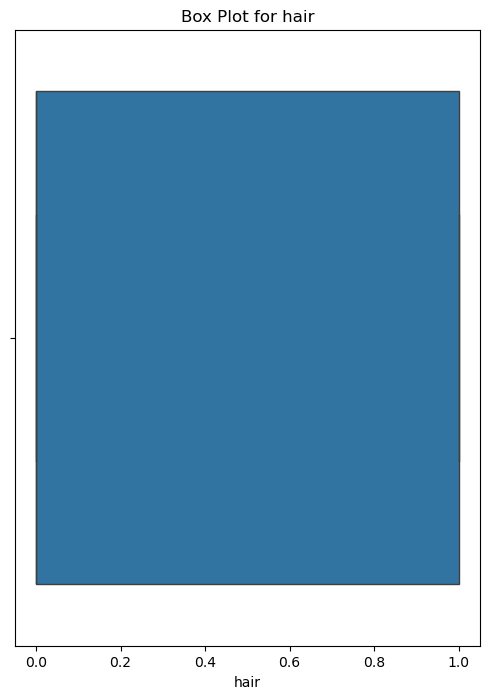

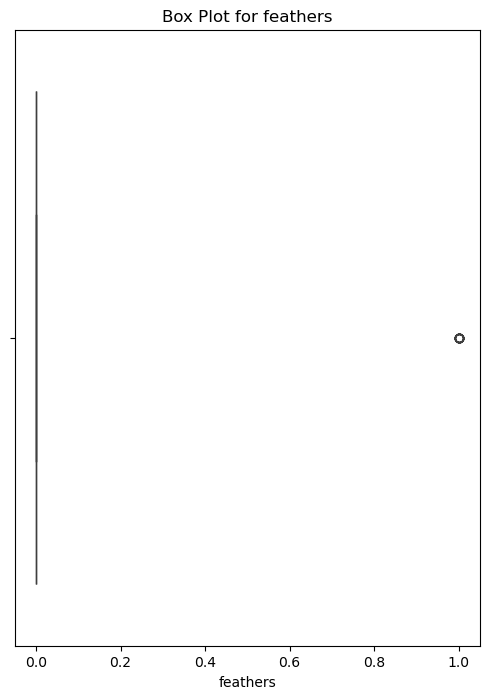

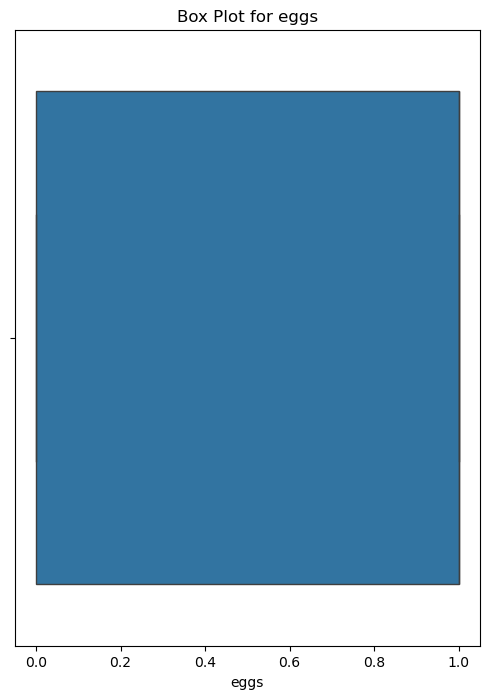

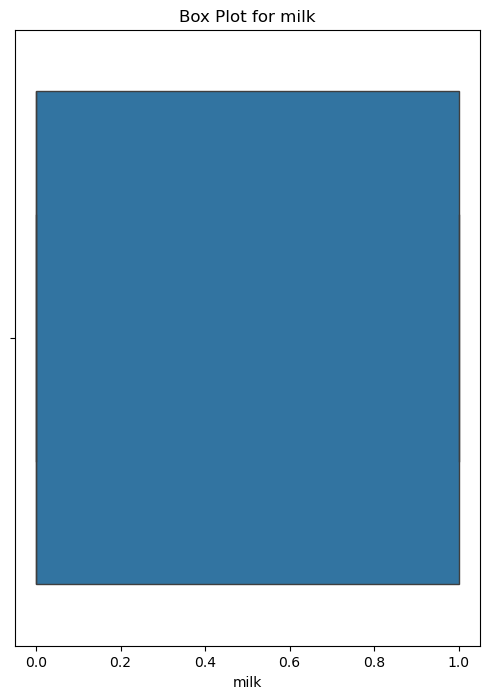

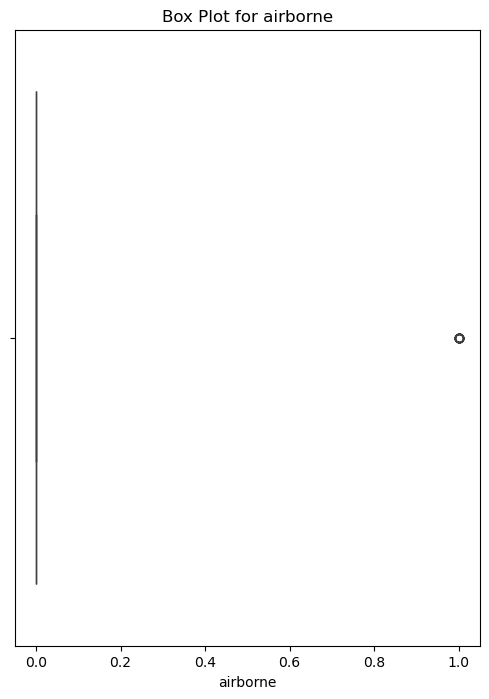

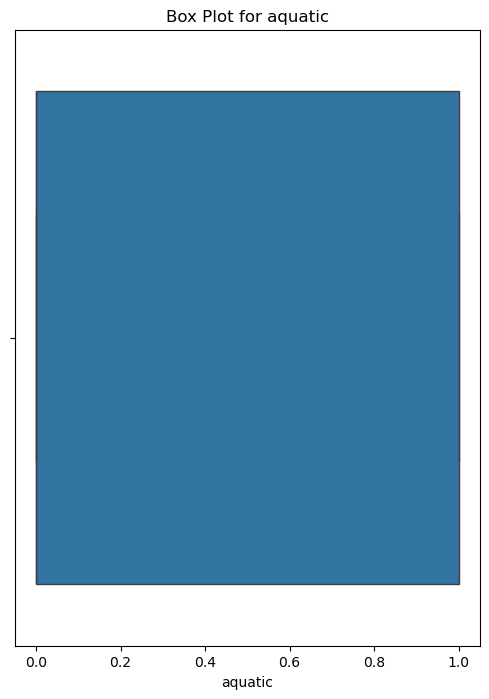

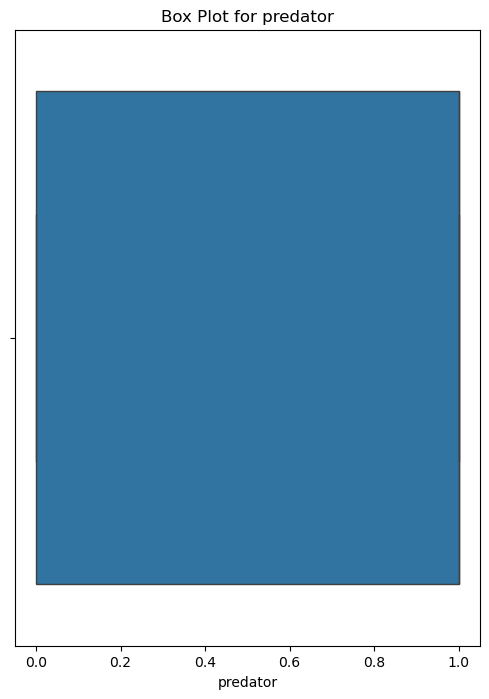

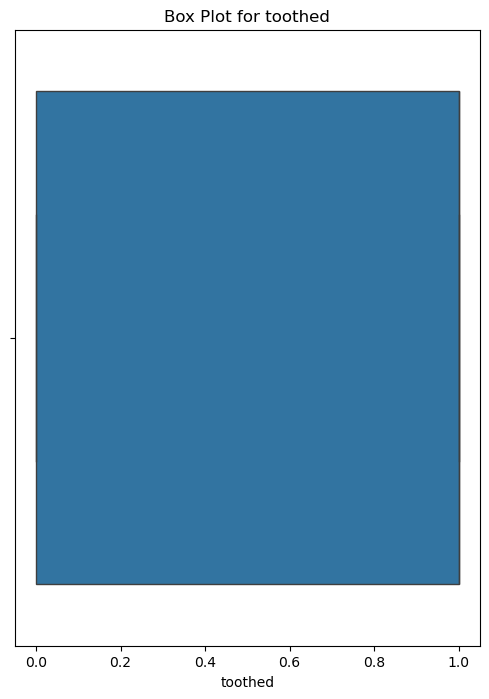

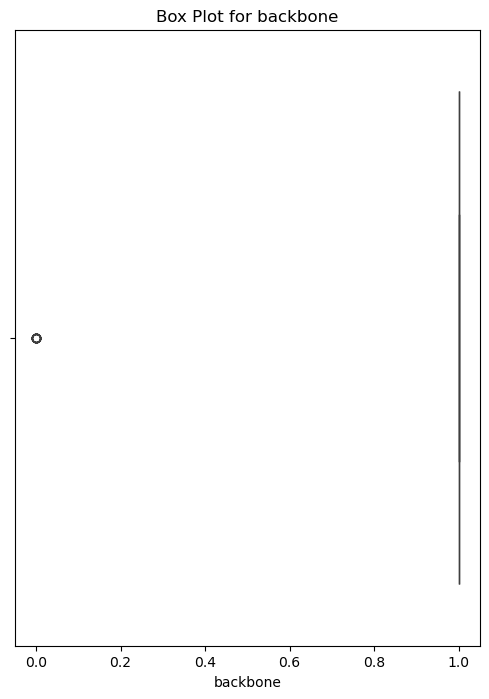

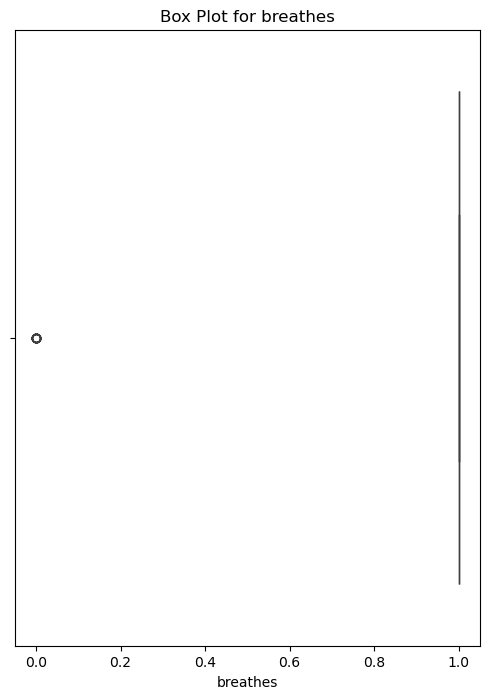

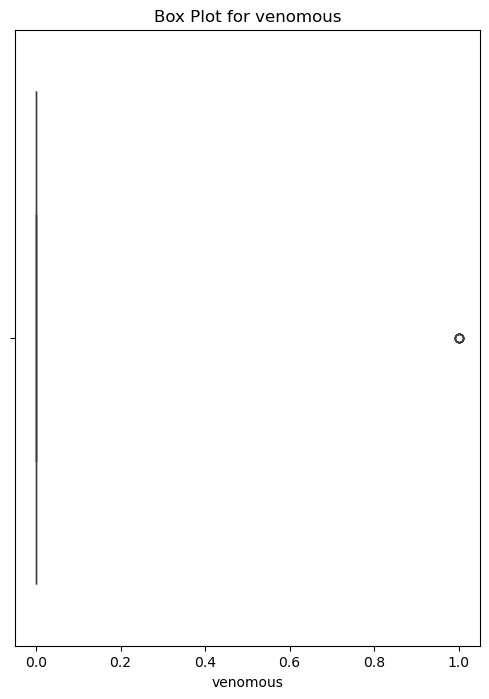

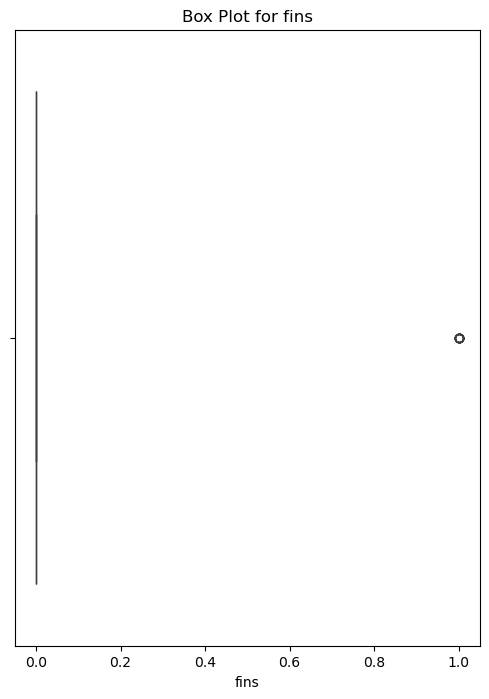

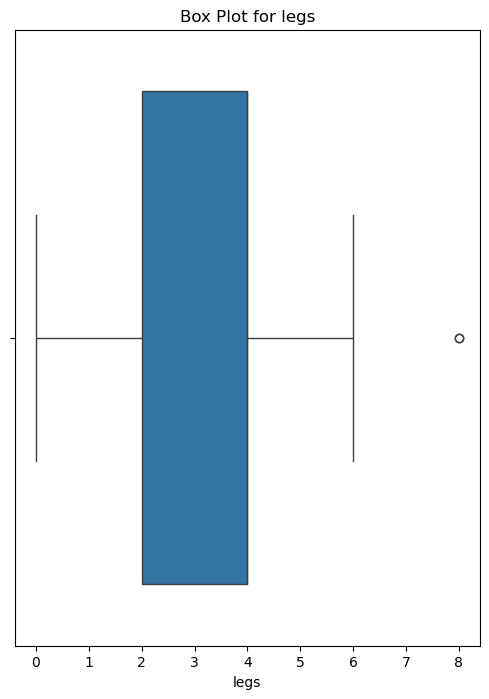

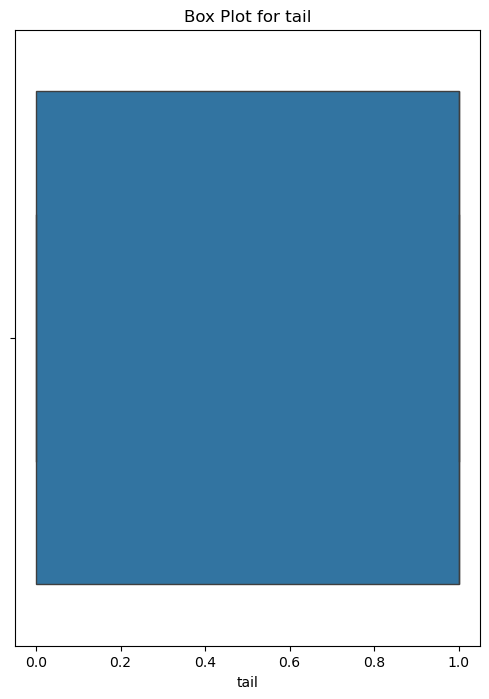

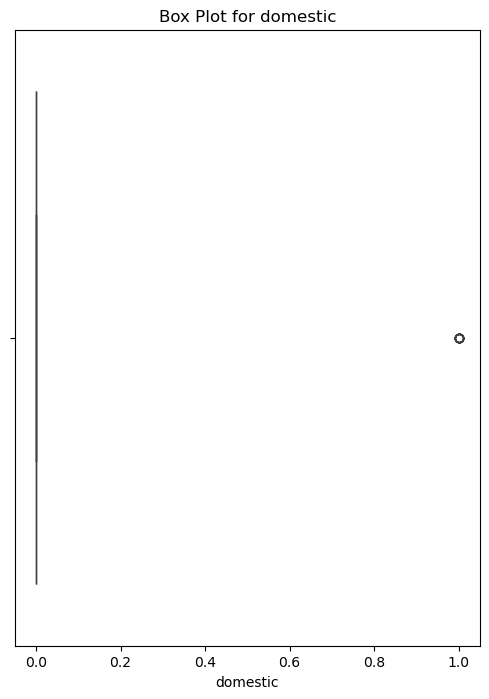

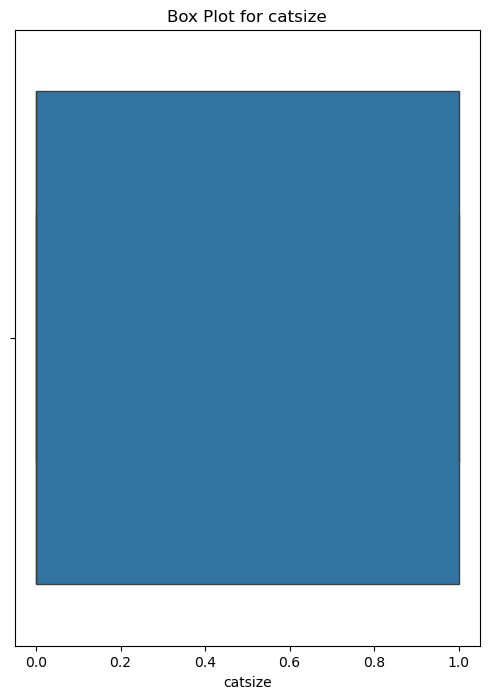

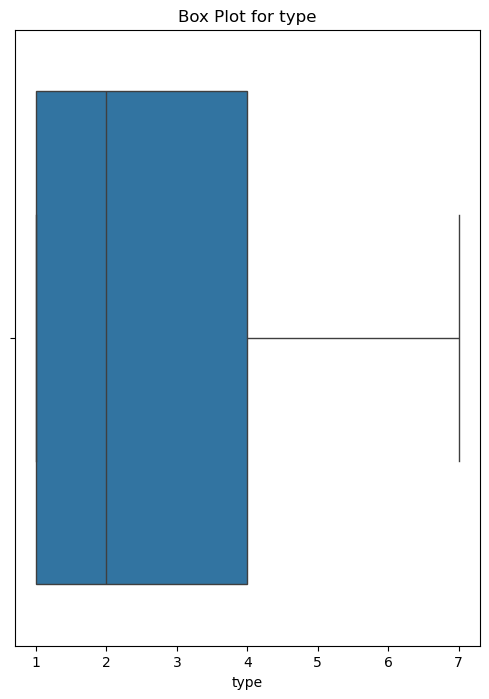

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols=df.select_dtypes(include=['int64']).columns

for cols in numeric_cols:
    plt.figure(figsize=(6,8))
    sns.boxplot(x=df[cols])
    plt.title(f"Box Plot for {cols}")

plt.show()

backbone,venomous,breathes,fins,legs and domestic are the features that are showing few scattered points as outliers, but nothing extreme or skewed. Most are mild outliers.

Most of the binary features (like hair, milk, toothed, etc.) do not show outliers, because they only have 0 or 1 values.

The outliers are very mild here so its better to keep them and just scale the features to reduce their impact.

Standardization:

In [86]:
from sklearn.preprocessing import StandardScaler

In [88]:
df_scaled=df.copy()

In [90]:
features=df_scaled.drop(['animal name','type'],axis=1)

In [92]:
scaler=StandardScaler()

In [94]:
scaled_features=scaler.fit_transform(features)

In [96]:
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

In [98]:
scaled_df['type'] = df['type'].values

3.Split the dataset into training and testing sets (80% training, 20% testing).

In [101]:
x=scaled_df.drop('type',axis=1)

In [103]:
y=scaled_df['type']

In [105]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

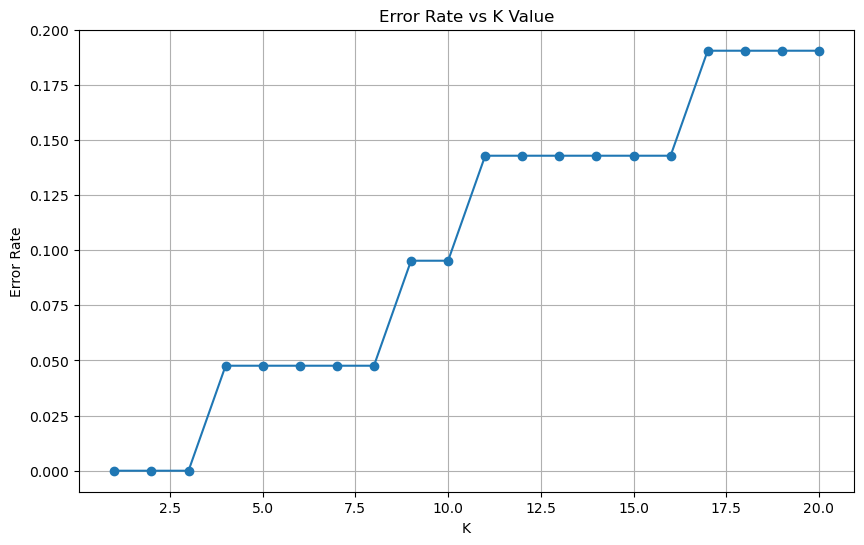

In [150]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_rates = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred_k = knn.predict(x_test)
    error = 1 - accuracy_score(y_test, pred_k)
    error_rates.append(error)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rates, marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

K=1,2,3 are giving lowest error rate.
So,selecting K=3 for KNN.

4.Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [114]:
from sklearn.neighbors import KNeighborsClassifier

5.Choose an appropriate distance metric and value for K.

In [123]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [125]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [121]:
y_pred=knn.predict(x_test)

6.Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [132]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [134]:
print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 1.0


In [144]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



- The model correctly identified the positive instances for each class with 100% accuracy. Precision is 1.00 for all classes.
- The model was able to find all the true instances for each class without any false negatives. Recall is 1.00 for all classes.
- Since both precision and recall are 1.00, the harmonic mean (F1-score) is also 1.00 for all classes.
- The overall accuracy of the model on the test data is 100%, meaning all the predictions were correct.


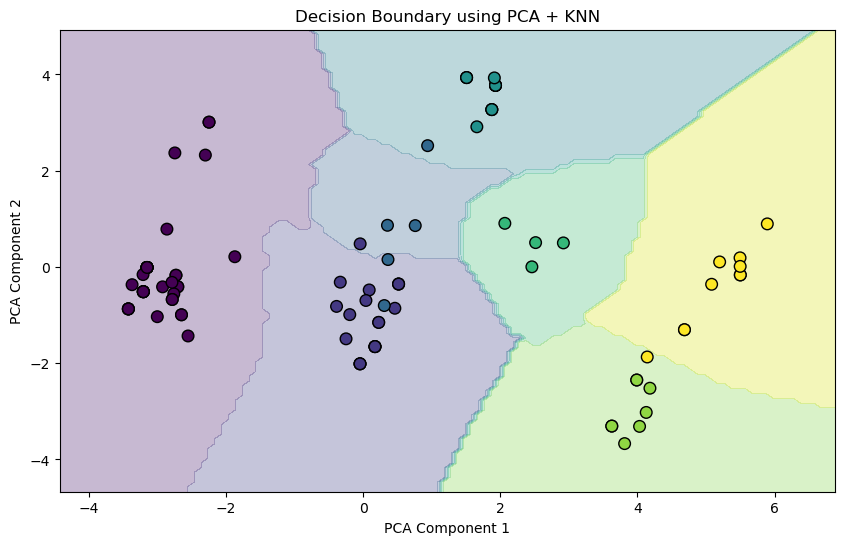

In [161]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

#Reduce all features to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)  

#Fit the KNN model on these 2 PCA components
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca, y)

#Create a mesh grid to plot decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

#Predict values on this grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plot decision boundary
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', s=70)
plt.title("Decision Boundary using PCA + KNN")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Used PCA (Principal Component Analysis) to reduce it to 2 dimensions for easy visualization.         
Then, we applied KNN classifier on this 2D data and plotted the decision boundaries using a mesh grid.                          
The final plot helps to see how the classifier separates different classes based on the reduced features.

Interview Questions:

1.What are the key hyperparameters in KNN?

The key hyperparameters in the K-Nearest Neighbors (KNN) algorithm are:

- n_neighbors(K):
 This defines the number of nearest neighbors to consider when making a prediction.

- weights:
uniform: All neighbors contribute equally to the prediction.
distance: Closer neighbors have more influence.

- metric:
Defines the distance function used to find the nearest neighbors (e.g., Euclidean, Manhattan).

- algorithm:
Controls the underlying algorithm used for nearest neighbor search.

- leaf_size:
Relevant when using tree-based algorithms (like kd_tree or ball_tree). Affects speed and memory usage.

2.What distance metrics can be used in KNN?

- Euclidean Distance (default):
Best for continuous numerical features.
Sensitive to scale.

- Manhattan Distance:
Better when features are sparse or have outliers.

- Minkowski Distance:
Generalization of Euclidean and Manhattan.

- Cosine Similarity (used in text data)
Measures angle between two vectors.

- Hamming Distance
Used for categorical or binary data.
Counts the number of positions at which the corresponding values are different.

